#Code

##Preparing

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

In [ ]:
names = ['Apple Braeburn','Apple Golden','Apple Granny Smith','Apple Pink Lady','Apple Red Yellow',
        'Apricot','Avocado','Banana Red','Banana','Beetroot',
         'Blueberry','Cactus fruit','Cauliflower','Cherry Yellow','Coconut',
         'Corn or Maize','Daisy','Dandelion','Tulips','Watermelon'
]

In [ ]:
image_size = 227
img_channel = 3 #Ảnh màu RGB
batch_size = 64
color_mode = 'rgb'

##Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = image_dataset_from_directory(
    '/content/drive/MyDrive/DO AN DL/Data/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
)

Found 14985 files belonging to 20 classes.


In [ ]:
dev_data = image_dataset_from_directory(
    '/content/drive/MyDrive/DO AN DL/Data/Fruit_Flower_Veg_Train_Dev',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
    subset = "validation",
    seed = 1,
    validation_split = 0.1,
)

Found 14985 files belonging to 20 classes.
Using 1498 files for validation.


In [ ]:
test_data = image_dataset_from_directory(
    '/content/drive/MyDrive/DO AN DL/Data/Fruit_Flower_Veg_Test',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
)

Found 4005 files belonging to 20 classes.


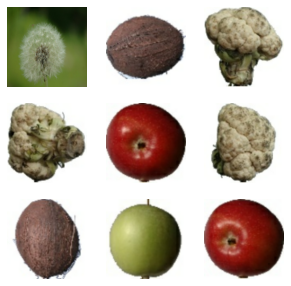

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
    plt.axis("off")

## GoogLenet

In [ ]:
#https://github.com/KhuyenLE-maths/Implementation-of-GoogLeNet-on-Keras/blob/main/Implementation_of_GoogLeNet_on_Keras.ipynb
#https://www.geeksforgeeks.org/understanding-googlenet-model-cnn-architecture/

In [ ]:
image_shape = (227,227,3)
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
 
  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (227,227,3))

  X = Conv2D(filters = 96, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  X = MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid')(X)

  X = Conv2D(filters = 256, kernel_size = (1,1), strides = 1, padding = 'valid', activation = 'relu')(X)

  X = Conv2D(filters = 384, kernel_size = (3,3), padding = 'valid', activation = 'relu')(X)

  X = MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid')(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  X = Flatten()(X)

  # Dropoutlayer 
  X = Dropout(0.5)(X)

  # output layer 
  X = Dense(20, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, X, name = 'GoogLeNet')

  return model

In [ ]:
model = GoogLeNet()
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 96  14208       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 55, 55, 96)   0           ['conv2d[0][0]']                 
                                                                                          

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
history = model.fit(train_data, epochs= 10, validation_data= dev_data)

Epoch 1/10
235/235 [==============================] - 73s 267ms/step - loss: 5.9824 - accuracy: 0.8147 - val_loss: 0.1443 - val_accuracy: 0.9433
Epoch 2/10
235/235 [==============================] - 62s 261ms/step - loss: 0.2254 - accuracy: 0.9279 - val_loss: 0.2567 - val_accuracy: 0.9052
Epoch 3/10
235/235 [==============================] - 62s 261ms/step - loss: 0.1584 - accuracy: 0.9449 - val_loss: 0.0682 - val_accuracy: 0.9746
Epoch 4/10
235/235 [==============================] - 62s 257ms/step - loss: 0.0856 - accuracy: 0.9672 - val_loss: 0.0545 - val_accuracy: 0.9813
Epoch 5/10
235/235 [==============================] - 63s 262ms/step - loss: 0.0692 - accuracy: 0.9747 - val_loss: 0.0471 - val_accuracy: 0.9840
Epoch 6/10
235/235 [==============================] - 62s 260ms/step - loss: 0.0808 - accuracy: 0.9716 - val_loss: 0.1025 - val_accuracy: 0.9673
Epoch 7/10
235/235 [==============================] - 61s 257ms/step - loss: 0.0636 - accuracy: 0.9777 - val_loss: 0.0533 - val_ac

<Figure size 432x288 with 0 Axes>

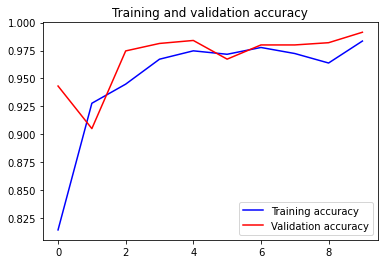

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

y_pred_total = []
y_true = []

for img, label in test_data:
    y_pred = model.predict(img)
    y_pred_total += np.argmax(y_pred,axis=-1).tolist()
    y_true += np.array(np.argmax(label,axis=-1)).flatten().tolist()
    
print(accuracy_score(y_true, y_pred_total)*100)
print(f1_score(y_true, y_pred_total,average='macro')*100)
print(recall_score(y_true,y_pred_total,average='macro')*100)
print(precision_score(y_true,y_pred_total,average='macro')*100)

96.70411985018727
97.9593339965297
98.1866005865451
97.8268331990412


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_total, digits=3, target_names= names))

                    precision    recall  f1-score   support

    Apple Braeburn      1.000     1.000     1.000       164
      Apple Golden      0.994     1.000     0.997       164
Apple Granny Smith      1.000     0.994     0.997       164
   Apple Pink Lady      1.000     1.000     1.000       152
  Apple Red Yellow      1.000     1.000     1.000       164
           Apricot      1.000     1.000     1.000       164
           Avocado      1.000     1.000     1.000       143
        Banana Red      1.000     1.000     1.000       166
            Banana      1.000     1.000     1.000       166
          Beetroot      1.000     0.960     0.980       150
         Blueberry      1.000     1.000     1.000       154
      Cactus fruit      1.000     1.000     1.000       166
       Cauliflower      0.996     1.000     0.998       234
     Cherry Yellow      1.000     1.000     1.000       164
           Coconut      0.988     1.000     0.994       166
     Corn or Maize      1.000     1.000

#Predict

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(227, 227))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 5_100.jpg to 5_100.jpg
5_100.jpg
[[2.2442718e-03 1.0973196e-11 3.4843476e-12 9.0889633e-01 8.5189693e-02
  4.7889372e-04 8.3419149e-13 3.1809362e-03 2.7301023e-11 1.6551480e-08
  6.6360599e-08 4.4812819e-13 1.5282891e-06 4.2615530e-16 8.2034485e-06
  2.2253154e-17 2.3334836e-11 1.1618184e-14 3.7109018e-08 2.4796680e-11]]


In [ ]:
names[np.argmax(classes)]

'Apple Pink Lady'